<a href="https://colab.research.google.com/github/ShrutiRajput1234/NNDL_Lab/blob/main/Practical_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**PRACTICAL 5**

**Aim :** To implement Simple autoencoder.

**Theory**:

An autoencoder is a type of artificial neural network used to learn data encodings in an unsupervised manner.The aim of an autoencoder is to learn a lower-dimensional representation (encoding) for a higher-dimensional data, typically for dimensionality reduction, by training the network to capture the most important parts of the input image.

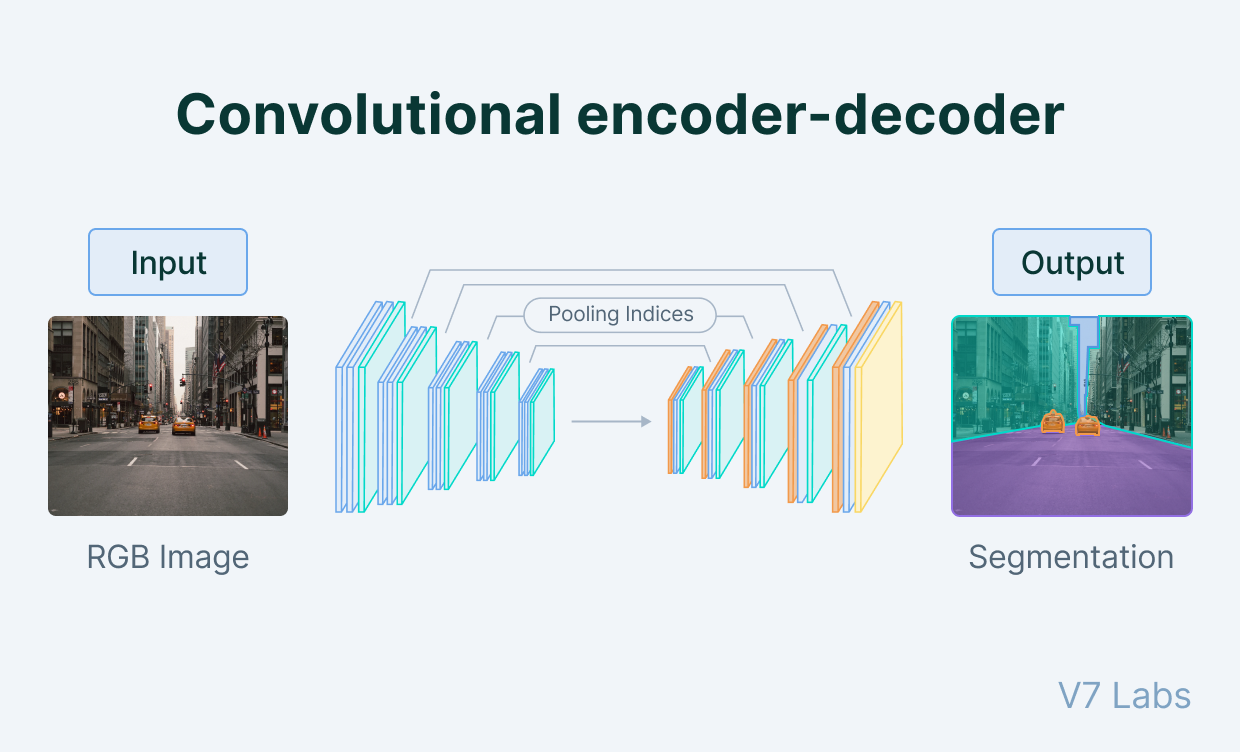

**Implementation**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
print("")

In [ ]:
## Seeding
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
## Loading the MNIST dataset and then normalizing the images.
#Autoencoder comes under unsupervised category so we dont provide y_test, y_train
dataset = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = dataset.load_data()
print(f"Original size: {x_train.shape} - {x_test.shape}")  
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step
Original size: (60000, 28, 28) - (10000, 28, 28)


Original size: (60000, 28, 28) - (10000, 28, 28)

In [ ]:
H = 28
W = 28
C = 1

In [ ]:
## Flattening the images.
x_train = np.reshape(x_train, (-1, H * W * C))
x_test = np.reshape(x_test, (-1, H * W * C))
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


Flatten size: (60000, 784) - (10000, 784)

Expading the dimension of the images on the last axis.This will convert them from (?, 28, 28) to (?, 28, 28, 1)

x_train = np.expand_dims(x_train, axis=-1)

x_test = np.expand_dims(x_test, axis=-1)

In [ ]:
## Latent space
latent_dim = 32

In [ ]:
## Building the autoencoder
inputs = Input(shape=(H*W*C,))
h = Dense(latent_dim, activation="relu")(inputs)
outputs = Dense(H*W*C, activation="sigmoid")(h)

In [ ]:
autoencoder = Model(inputs, outputs)
autoencoder.compile(optimizer=Adam(1e-3), loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Training the autoencoder
autoencoder.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=256,
    shuffle=False,
    validation_data=(x_test, x_test)
)

Epoch 1/50
235/235 [==============================] - 4s 13ms/step - loss: 0.2861 - val_loss: 0.2071
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1851 - val_loss: 0.1677
Epoch 3/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1573 - val_loss: 0.1474
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1409 - val_loss: 0.1339
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1297 - val_loss: 0.1241
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1216 - val_loss: 0.1169
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1155 - val_loss: 0.1114
Epoch 8/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1108 - val_loss: 0.1074
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1070 - val_loss: 0.1047
Epoch 10/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1041 - val_lo

In [ ]:
test_pred_y = autoencoder.predict(x_test)

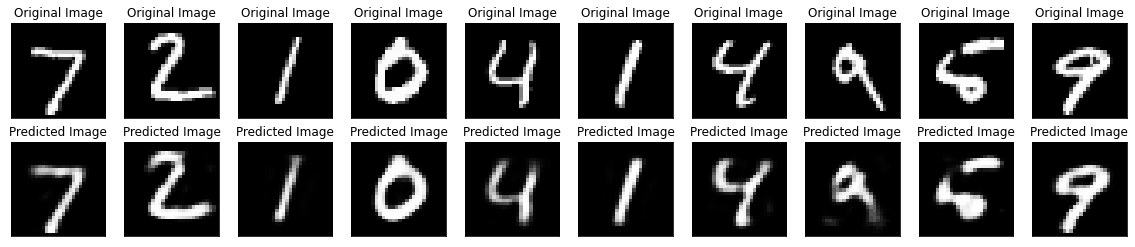

In [ ]:
n = 10  ## how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    ## display original
    ax = plt.subplot(2, n, i + 1)
    ax.set_title("Original Image")
    plt.imshow(x_test[i].reshape(H, W))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ## display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    ax.set_title("Predicted Image")
    plt.imshow(test_pred_y[i].reshape(H, W))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

**Conclusion**:
In this practical we have implemented simple autoencoder.